In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
df_merge = pd.merge(ride_data, city_data, left_on='city', right_on='city')
df_merge = df_merge.sort_values("city", ascending=True)
df_merge.head()

,city,date,fare,ride_id,driver_count,type
1565,Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
1562,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1563,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
1564,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
1566,Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban


## Bubble Plot of Ride Sharing Data

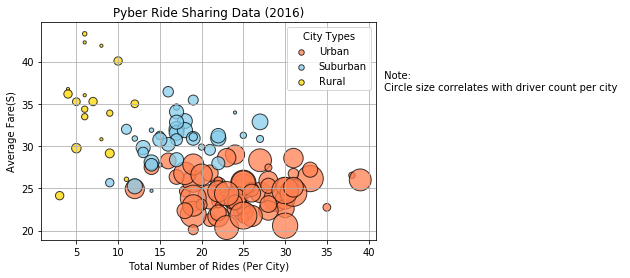

In [3]:
# Obtain the x and y coordinates for each of the three city types

urban_df = df_merge[df_merge.type == 'Urban']
suburban_df = df_merge[df_merge.type == 'Suburban']
rural_df = df_merge[df_merge.type == 'Rural']

u_grouped = urban_df.groupby("city")
s_grouped = suburban_df.groupby("city")
r_grouped = rural_df.groupby("city")

u_rides_per_city = u_grouped["city"].count()
u_total_fare = u_grouped["fare"].sum()

u_avg_fare = u_total_fare/u_rides_per_city


urban = u_grouped["driver_count"].value_counts()

new_urban = pd.DataFrame(data=urban)
new_urban = new_urban.drop(columns=['driver_count'])

new_urban = new_urban.reset_index()



s_rides_per_city = s_grouped["city"].count()
s_total_fare = s_grouped["fare"].sum()

s_avg_fare = s_total_fare/s_rides_per_city


suburban = s_grouped["driver_count"].value_counts()

new_suburban = pd.DataFrame(data=suburban)
new_suburban = new_suburban.drop(columns=['driver_count'])

new_suburban = new_suburban.reset_index()



r_rides_per_city = r_grouped["city"].count()
r_total_fare = r_grouped["fare"].sum()

r_avg_fare = r_total_fare/r_rides_per_city


rural = r_grouped["driver_count"].value_counts()

new_rural = pd.DataFrame(data=rural)
new_rural = new_rural.drop(columns=['driver_count'])

new_rural = new_rural.reset_index()


# Build the scatter plots for each city types

plt.scatter(u_rides_per_city, u_avg_fare, marker="o", facecolors="coral", edgecolors="black",
            s=(10*new_urban["driver_count"]), alpha=0.75, label="Urban")
plt.scatter(s_rides_per_city, s_avg_fare, marker="o", facecolors="skyblue", edgecolors="black",
            s=(10*new_suburban["driver_count"]), alpha=0.75, label="Suburban")
plt.scatter(r_rides_per_city, r_avg_fare, marker="o", facecolors="gold", edgecolors="black",
            s=(10*new_rural["driver_count"]), alpha=0.75, label="Rural")

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare(S)')



# Incorporate the other graph properties
plt.grid()

# Create a legend
legend = plt.legend(loc='best', title="City Types", numpoints=1)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.figtext(.9125, .675, ' Note: \n Circle size correlates with driver count per city  ', horizontalalignment='left',
    verticalalignment='center')

# Incorporate a text label regarding circle size
plt.savefig("PyberRideShare.png",bbox_inches = "tight")
# Save Figure
plt.show()



## Total Fares by City Type

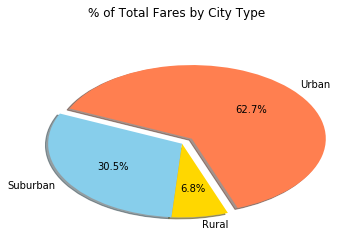

In [7]:
# Calculate Type Percents
total_fare = df_merge["fare"].sum()
percents_fare = []
labels = ["Urban", "Suburban","Rural"]
colors = ["coral","skyblue","gold"]
explode = (0.1, 0, 0)


u_fare_sum = u_total_fare.sum()
u_percent_fare = (u_fare_sum/total_fare)*100
percents_fare.append(u_percent_fare)

s_fare_sum = s_total_fare.sum()
s_percent_fare = (s_fare_sum/total_fare)*100
percents_fare.append(s_percent_fare)


r_fare_sum = r_total_fare.sum()
r_percent_fare = (r_fare_sum/total_fare)*100
percents_fare.append(r_percent_fare)


fig1, ax1 = plt.subplots()
ax1.pie(percents_fare, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = colors, shadow=True, startangle=290)
ax1.set_aspect(.55)  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("% of Total Fares by City Type", fontsize=12)




# Save Figure
plt.savefig("PyberTotalFares.png",bbox_inches = "tight")
plt.show()

## Total Rides by City Type

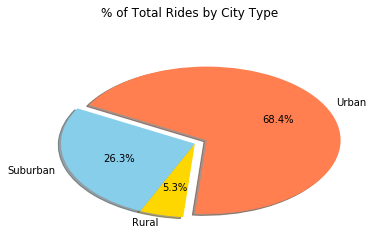

In [5]:
# Calculate Ride Percents
ride_count = df_merge["driver_count"].count()
percents_ride = []


u_rides = u_rides_per_city.sum()
u_ride_percent = u_rides/ride_count*100
percents_ride.append(u_ride_percent)

s_rides = s_rides_per_city.sum()
s_ride_percent = s_rides/ride_count*100
percents_ride.append(s_ride_percent)

r_rides = r_rides_per_city.sum()
r_ride_percent = r_rides/ride_count*100
percents_ride.append(r_ride_percent)


# Save Figure
fig1, ax1 = plt.subplots()
ax1.pie(percents_ride, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = colors, shadow=True, startangle=265)
ax1.set_aspect(.55)  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("% of Total Rides by City Type", fontsize=12)

# Save Figure
plt.savefig("PyberTotalRides.png",bbox_inches = "tight")
plt.show()

## Total Drivers by City Type

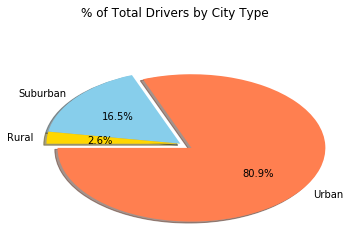

In [6]:
# Calculate Driver Percents

percents_driver = []

u_drivers = new_urban["driver_count"].sum()
s_drivers = new_suburban["driver_count"].sum()
r_drivers = new_rural["driver_count"].sum()

driver_count = u_drivers + s_drivers + r_drivers

u_driver_percent = u_drivers/driver_count*100
percents_driver.append(u_driver_percent)

s_driver_percent = s_drivers/driver_count*100
percents_driver.append(s_driver_percent)

r_driver_percent = r_drivers/driver_count*100
percents_driver.append(r_driver_percent)

# Build Pie Charts
fig1, ax1 = plt.subplots()
ax1.pie(percents_driver, explode=explode, labels=labels, autopct='%1.1f%%',
        colors = colors, shadow=True, startangle=180)
ax1.set_aspect(.55)  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("% of Total Drivers by City Type", fontsize=12)

# Save Figure
plt.savefig("PyberTotalDrivers.png",bbox_inches = "tight")
plt.show()
